In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('pd_speech_features.csv') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [3]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [4]:
null_values=df.isnull().sum()

In [5]:
null_values

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [6]:
y = df.loc[:,'class']
X = df.drop(['class', 'id'], axis=1)

In [7]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [8]:
X

array([[ 0.96874225,  0.62764391,  0.2561442 , ..., -0.775137  ,
        -0.81472704, -0.36659507],
       [ 0.96874225,  0.12161952, -0.08043329, ..., -0.52664699,
        -0.58297219,  0.40039616],
       [ 0.96874225,  0.61795018, -0.34983882, ..., -0.75606253,
        -0.8043897 , -0.7809355 ],
       ...,
       [-1.03226633,  0.81336154,  0.3292009 , ..., -0.71674252,
        -0.79017671, -0.77287314],
       [-1.03226633,  0.54105055,  0.69591966, ..., -0.77132466,
        -0.82631929, -0.81173208],
       [-1.03226633,  0.3945807 ,  0.92284035, ..., -0.68658105,
        -0.84098293, -0.82811405]])

In [9]:
y

0      1
1      1
2      1
3      1
4      1
      ..
751    0
752    0
753    0
754    0
755    0
Name: class, Length: 756, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)

In [11]:
from sklearn.svm import SVC
classifier_1 = SVC(kernel='linear')
classifier_2 = SVC(kernel='rbf')
classifier_3 = SVC(kernel='poly')

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

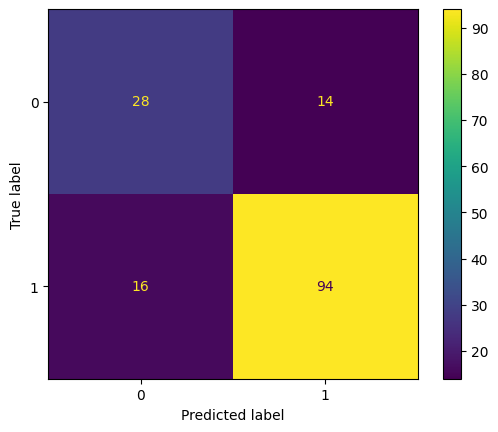

In [14]:
classifier_1.fit(X_train, y_train)
y_pred_1 = classifier_1.predict(X_test)
confusion_matrix_1 = confusion_matrix(y_test, y_pred_1)
cm_display_1 = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_1, display_labels = [0, 1])
cm_display_1.plot()
plt.show()

In [15]:
accuracy_1 = accuracy_score(y_test,y_pred_1)
print(f"Acuracy dla liniowego kernela{accuracy_1}")

Acuracy dla liniowego kernela0.8026315789473685


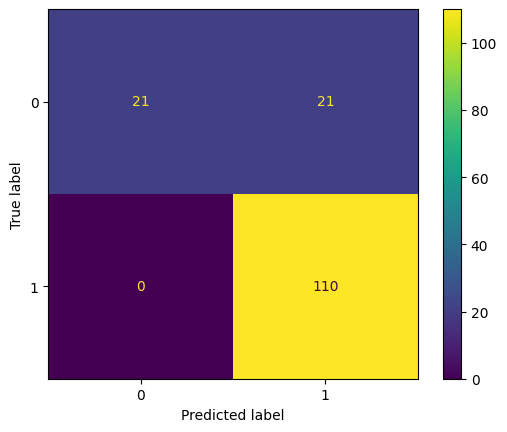

In [16]:
classifier_2.fit(X_train, y_train)
y_pred_2 = classifier_2.predict(X_test)
confusion_matrix_2 = confusion_matrix(y_test, y_pred_2)
cm_display_2 = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_2, display_labels = [0, 1])
cm_display_2.plot()
plt.show()

In [17]:
accuracy_2 = accuracy_score(y_test,y_pred_2)
print(f"Acuracy kernela rbf {accuracy_2}")

Acuracy kernela rbf 0.8618421052631579


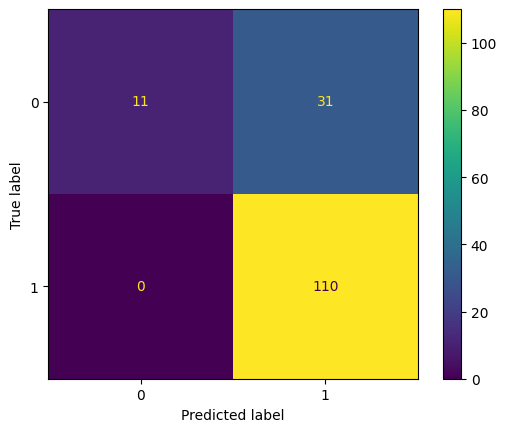

In [18]:
classifier_3.fit(X_train, y_train)
y_pred_3 = classifier_3.predict(X_test)
confusion_matrix_3 = confusion_matrix(y_test, y_pred_3)
cm_display_3 = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_3, display_labels = [0, 1])
cm_display_3.plot()
plt.show()

In [20]:
accuracy_3 = accuracy_score(y_test,y_pred_3)
print(f"Acuracy kernela wielowymianowego {accuracy_3}")

Acuracy kernela wielowymianowego 0.7960526315789473
